<a href="https://colab.research.google.com/github/elguera90/Comunicaciones_Inalambricas/blob/main/Sinusoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


SEÑAL SINUSOIDAL

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


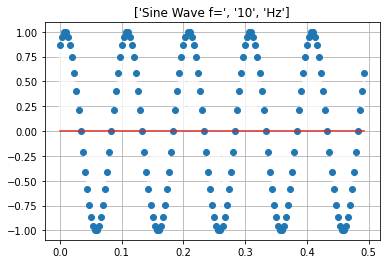

In [ ]:
f=10 #frequency of sine wave
overSampRate=30 #oversampling rate
fs= overSampRate * f #sampling frequency
phase = 1/3*pi #desired phase shift in radians
nCyl = 5 #to generate five cycles of sine wave
# t=0:1/fs:nCyl*1/f-1/fs; #time base
t = arange(0,nCyl*1/f-1/fs, 1/fs) # Perido entre muestras 1/fs
g=sin(2*pi*f*t+phase) #replace with cos if a cosine wave is desired
stem(t,g,linefmt='white')
title(['Sine Wave f=', str(f), 'Hz'])
grid()

SEÑAL CUADRADA

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, "['Onda cuadrada f=', '10', 'Hz | $f_s=$', '300', 'sps']")

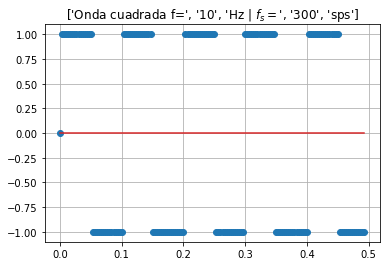

In [ ]:
f=10 #frequency of sine wave in Hz
overSampRate=30 #oversampling rate
fs=overSampRate*f #sampling frequency
nCyl = 5 #to generate five cycles of square wave
# t=0:1/fs:nCyl*1/f-1/fs #time base
t = arange(0,nCyl*1/f-1/fs,1/fs)
g = sign(sin(2*pi*f*t))
stem(t,g,linefmt=" ")
# plot(t,g)
grid()
title(['Onda cuadrada f=', str(f), 'Hz | $f_s=$',str(round(fs,1)),'sps'])

SEÑAL GAUSSIANA

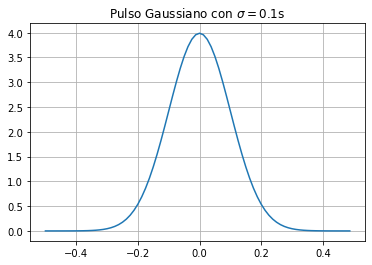

In [ ]:
fs=80 # frec. muestreo

sigma=0.1 # desviación estándar
# t=-0.5:1/fs:0.5; #time base

t = arange(-0.5,0.5,1/fs) # vector tiempo

g=1/(sqrt(2*pi)*sigma)*(exp(-t**2/(2*sigma**2))) # definición de la función gaussiana

plot(t,g) # presentación
title('Pulso Gaussiano con 'r'$\sigma=$' + str(sigma) + 's')
grid() 

Implementando la FFT en señales

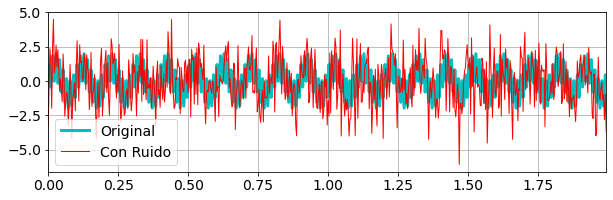

In [ ]:
## Creando la señal sinusoidal que resulta de combinar otras 02 ##
# dt = 0.001 # definición de delta t
# t = arange(0,1,dt) # Período entre muestras 1/fs
f_ref = 10
fs = 32*f_ref
# t = arange(0,nCyl*1/f-1/fs, 1/fs) # Perido entre muestras 1/fs
t = arange(0,2-1/fs,1/fs)

phase1 = 0*pi # fase para la señal 1
phase2 = 0*pi # fase para la señal 2

f1 = 10 # Hz, frecuencia de señal 1
f2 = 80 # Hz, frecuencia de señal 2
signal =sin(2*pi*f1*t+phase1) + sin(2*pi*f2*t+phase2) # combinacion de señales sinusoidales
signal_ruido = signal + 1.5*random.randn(len(t))

## Ploteo de señales
rcParams['figure.figsize'] = [10,10]
rcParams.update({'font.size':14})
plt.subplot(3,1,1)
# stem(t,g,linefmt='white')
plt.plot(t,signal, color='c', LineWidth=3,label='Original')
plt.plot(t,signal_ruido, color='r', LineWidth=1,label='Con Ruido')
plt.xlim(t[0],t[-1])
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


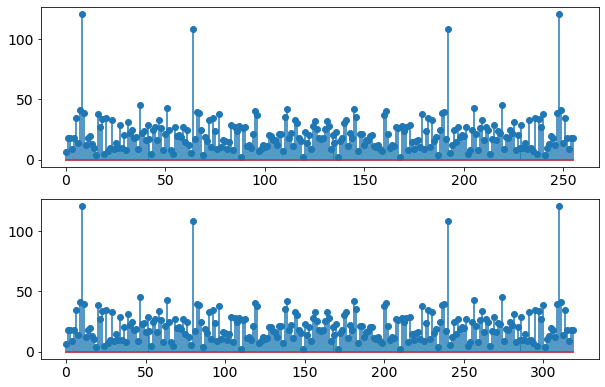

In [ ]:
N = 256
X = fft.fft(signal_ruido,N)

## Calculando las componentes frecuenciales con la FFT
df = fs / N # resolución de la frecuencia 
index = arange(0,N,1) # índice para el plot FFT 
f = index*df   # los índices convertidos en frecuencias

plt.subplot(3,1,2)
stem(index,abs(X)) # valores de la muestra en el eje x
plt.subplot(3,1,3)
stem(f,abs(X)) # valores de la muestra en el eje x
plt.show()

Desplazamiento FFT (*FFTShift*)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


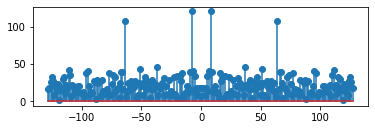

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

Text(0, 0.5, '|X(f)|')

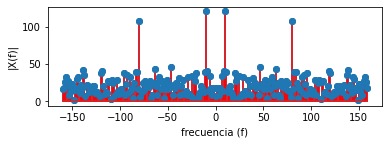

In [ ]:
# a = [1,2]
# b = [3,4]
# c = concatenate([a[0:1],b[1:2]])
# print(c)

# print(X[0:5])
X1 = concatenate([X[int(N/2):N],X[0:int(N/2)]])
# print(X1[0:5])
X2 = fft.fftshift(X) # ordena las frecuencias 
# print(X2[0:5])

df = fs/N # resolución de frecuencias
index = arange(int(-N/2),int(N/2)) # índice para el ploteo FFT
# print(index)

f = index * df

figure()
subplot(2,1,1)
stem(index,abs(X1))
show()
stem(index,abs(X2),'r')
title('Dominio Frecuencia')
xlabel('k')
ylabel('|X(k)|')

subplot(2,1,2)
stem(f,abs(X1))
stem(f,abs(X2),'r')
xlabel('frecuencia (f)')
ylabel('|X(f)|')